Выводим для начала размерность входных данных.
Также смотрим где есть пропуски и убираем их.

In [113]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler


df = pd.read_csv('/content/Life Expectancy Data.csv')

sh = df.shape
print("Размерноcть входных данных: ", sh)

nanana = df.isna().sum()
nanana

Размерноcть входных данных:  (2938, 22)


Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

Так ну Population, GDP, Hepatitis B и ещё стлбик Total expenditure мы убираем потому что там пропусков слишком много. Во всех остальных случаях пожалуй уберём строки с пропусками.

In [114]:
df = df.drop(columns = ['Country', 'Population', 'GDP', 'Hepatitis B', 'Total expenditure'])
df = df.dropna()


def mp(value):
  if value == 'Developing':
    return 0
  elif value == 'Developed':
    return 1
  else:
    return value

df['Status'] = df['Status'].apply(mp)

df


,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,0,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,65.0,0.1,17.2,17.3,0.479,10.1
1,2014,0,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,62.0,0.1,17.5,17.5,0.476,10.0
2,2013,0,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,64.0,0.1,17.7,17.7,0.470,9.9
3,2012,0,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,67.0,0.1,17.9,18.0,0.463,9.8
4,2011,0,59.2,275.0,71,0.01,7.097109,3013,17.2,97,68.0,68.0,0.1,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,0,44.3,723.0,27,4.36,0.000000,31,27.1,42,67.0,65.0,33.6,9.4,9.4,0.407,9.2
2934,2003,0,44.5,715.0,26,4.06,0.000000,998,26.7,41,7.0,68.0,36.7,9.8,9.9,0.418,9.5
2935,2002,0,44.8,73.0,25,4.43,0.000000,304,26.3,40,73.0,71.0,39.8,1.2,1.3,0.427,10.0
2936,2001,0,45.3,686.0,25,1.72,0.000000,529,25.9,39,76.0,75.0,42.1,1.6,1.7,0.427,9.8


Проанализируем выбросы.

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,0,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,65.0,0.1,17.2,17.3,0.479,10.1
1,2014,0,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,62.0,0.1,17.5,17.5,0.476,10.0
2,2013,0,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,64.0,0.1,17.7,17.7,0.470,9.9
3,2012,0,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,67.0,0.1,17.9,18.0,0.463,9.8
4,2011,0,59.2,275.0,71,0.01,7.097109,3013,17.2,97,68.0,68.0,0.1,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,0,44.3,723.0,27,4.36,0.000000,31,27.1,42,67.0,65.0,33.6,9.4,9.4,0.407,9.2
2934,2003,0,44.5,715.0,26,4.06,0.000000,998,26.7,41,7.0,68.0,36.7,9.8,9.9,0.418,9.5
2935,2002,0,44.8,73.0,25,4.43,0.000000,304,26.3,40,73.0,71.0,39.8,1.2,1.3,0.427,10.0
2936,2001,0,45.3,686.0,25,1.72,0.000000,529,25.9,39,76.0,75.0,42.1,1.6,1.7,0.427,9.8


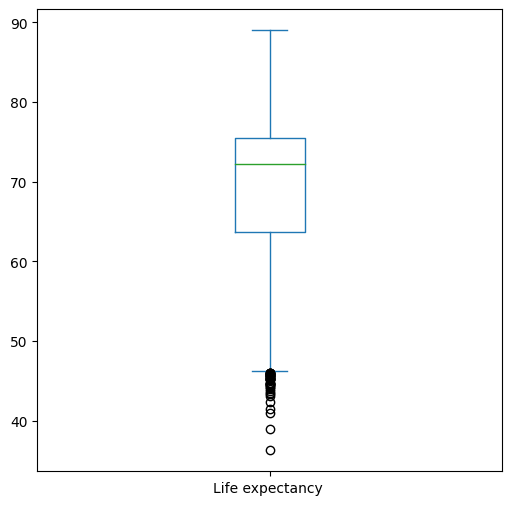

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns



df['Life expectancy '].plot.box(return_type='both', figsize=(6,6))
df

Теперь надо поделить на тренировочную и тестовую части. Возьмём 1978 строк для тренировки, а остольное получается на тесты.

In [116]:
x_train, x_test, y_train, y_test = train_test_split(df[['Life expectancy ', 'Schooling', 'Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Measles ', ' BMI ',  'under-five deaths ', 'Polio', 'Diphtheria ', ' HIV/AIDS', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources']],
                                                    df['Life expectancy '], test_size=0.3)

Теперь надо анализировать влияние признаков на наш результат.

Таблица кареляции.

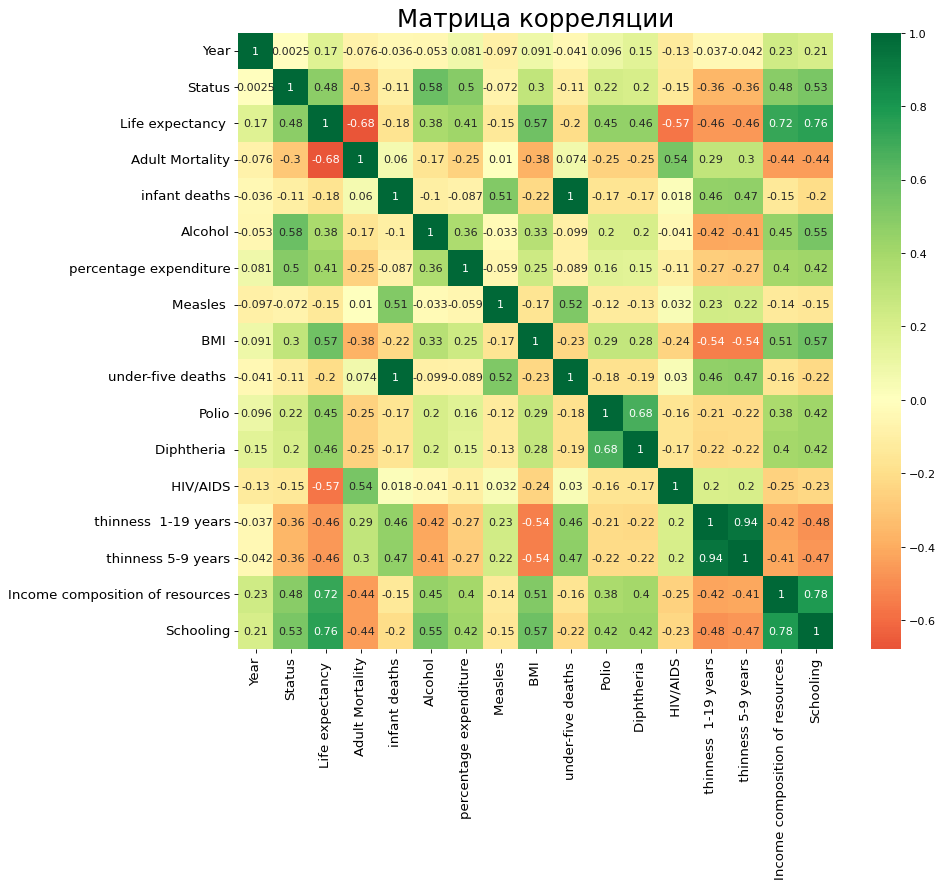

In [117]:
import seaborn as sns

plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)


plt.title('Матрица корреляции', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


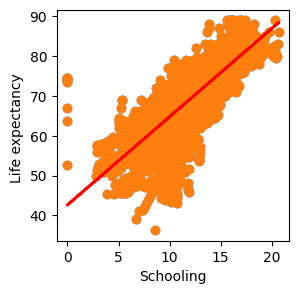

Mean Absolute Error: 4.510692906665167
Mean Squared Error: 37.68370329624549
R2 score: 0.5731602839617337


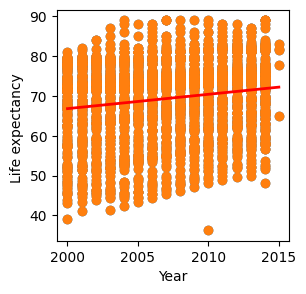

Mean Absolute Error: 7.578947005648692
Mean Squared Error: 85.8633363428732
R2 score: 0.027434171886666636


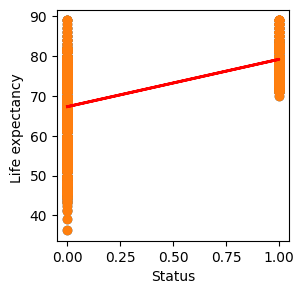

Mean Absolute Error: 6.614375017759899
Mean Squared Error: 68.31248379758392
R2 score: 0.22623100609821145


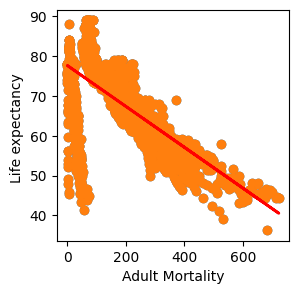

Mean Absolute Error: 4.866661044742102
Mean Squared Error: 47.67412209202293
R2 score: 0.4599997623333336


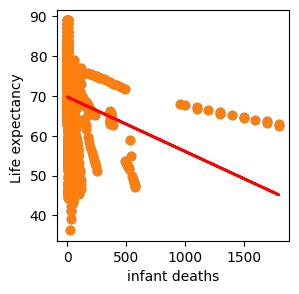

Mean Absolute Error: 7.457287022422582
Mean Squared Error: 85.4683247653294
R2 score: 0.03190843038151636


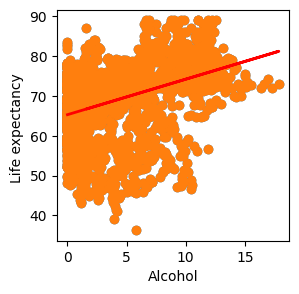

Mean Absolute Error: 6.8008538836881565
Mean Squared Error: 75.51249482775684
R2 score: 0.14467716730929425


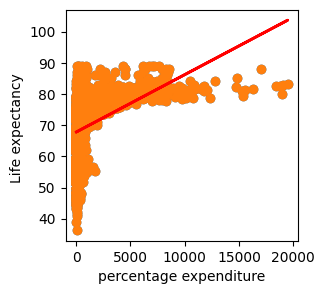

Mean Absolute Error: 6.874638679278363
Mean Squared Error: 73.23298342890406
R2 score: 0.17049697569020905


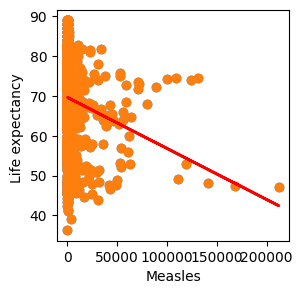

Mean Absolute Error: 7.499992775845151
Mean Squared Error: 86.38213350240132
R2 score: 0.02155780590125389


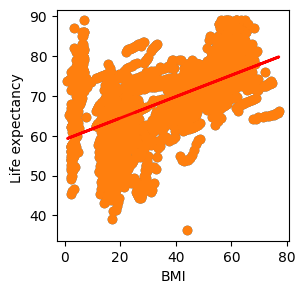

Mean Absolute Error: 5.831466457207462
Mean Squared Error: 60.009958502321744
R2 score: 0.32027291889990017


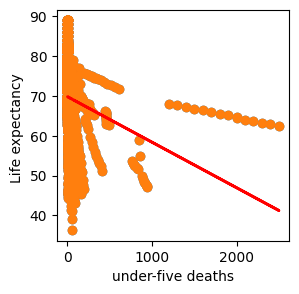

Mean Absolute Error: 7.408540399703794
Mean Squared Error: 84.62505005151215
R2 score: 0.04146012270215582


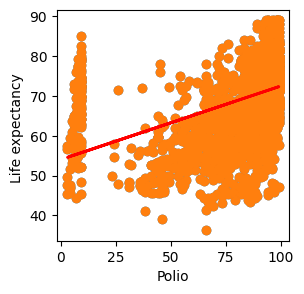

Mean Absolute Error: 6.47265350612201
Mean Squared Error: 70.31893680498219
R2 score: 0.20350410409526176


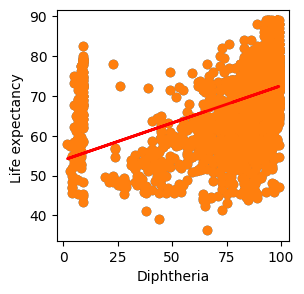

Mean Absolute Error: 6.403334536490669
Mean Squared Error: 69.50036199565793
R2 score: 0.2127760229515716


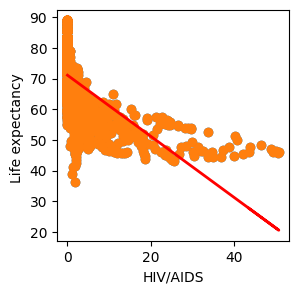

Mean Absolute Error: 6.172997762398563
Mean Squared Error: 59.440371374817445
R2 score: 0.3267245780123741


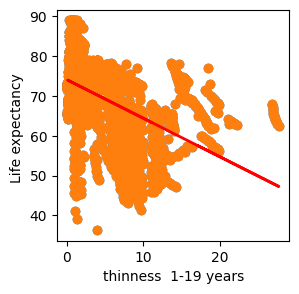

Mean Absolute Error: 6.584447194808793
Mean Squared Error: 69.27187388965606
R2 score: 0.2153640859536936


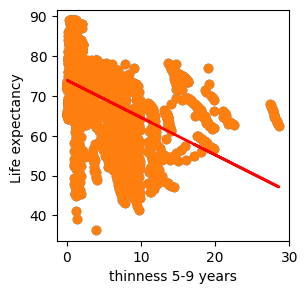

Mean Absolute Error: 6.5904989133035565
Mean Squared Error: 69.71183213141092
R2 score: 0.2103807208766726


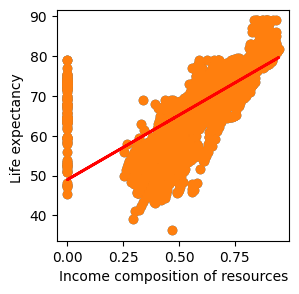

Mean Absolute Error: 4.404621695631059
Mean Squared Error: 42.70682915873159
R2 score: 0.5162638160134347


In [118]:
from typing import ValuesView
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# df.columns

'Life expectancy ', 'Schooling', 'Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Measles ', ' BMI ',  'under-five deaths ', 'Polio', 'Diphtheria ', ' HIV/AIDS', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources'

y = df['Life expectancy '].values
x1 = df['Schooling'].values
x2 = df['Year'].values
x3 = df['Status'].values
x4 = df['Adult Mortality'].values
x5 = df['infant deaths'].values
x6 = df['Alcohol'].values
x7 = df['percentage expenditure'].values
x8 = df['Measles '].values
x9 = df[' BMI '].values
x10 = df['under-five deaths '].values
x11 = df['Polio'].values
x12 = df['Diphtheria '].values
x13 = df[' HIV/AIDS'].values
x14 = df[' thinness  1-19 years'].values
x15 = df[' thinness 5-9 years'].values
x16 = df['Income composition of resources'].values

fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(x1, y)
plt.xlabel("Schooling")
plt.ylabel("Life expectancy ")
model = LinearRegression()
x1 = x1.reshape(-1, 1)
model.fit(x1, y)
y_pred = model.predict(x1)
plt.scatter(x1, y)
plt.plot(x1, y_pred, color='red', linewidth=2);
plt.show()
print('Mean Absolute Error:', mean_absolute_error(y, y_pred))
print('Mean Squared Error:', mean_squared_error(y, y_pred))
print('R2 score:', r2_score(y, y_pred))

fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(x2, y)
plt.xlabel("Year")
plt.ylabel("Life expectancy ")
model = LinearRegression()
x2 = x2.reshape(-1, 1)
model.fit(x2, y)
y_pred = model.predict(x2)
plt.scatter(x2, y)
plt.plot(x2, y_pred, color='red', linewidth=2);
plt.show()
print('Mean Absolute Error:', mean_absolute_error(y, y_pred))
print('Mean Squared Error:', mean_squared_error(y, y_pred))
print('R2 score:', r2_score(y, y_pred))

fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(x3, y)
plt.xlabel("Status")
plt.ylabel("Life expectancy ")
model = LinearRegression()
x3 = x3.reshape(-1, 1)
model.fit(x3, y)
y_pred = model.predict(x3)
plt.scatter(x3, y)
plt.plot(x3, y_pred, color='red', linewidth=2);
plt.show()
print('Mean Absolute Error:', mean_absolute_error(y, y_pred))
print('Mean Squared Error:', mean_squared_error(y, y_pred))
print('R2 score:', r2_score(y, y_pred))

fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(x4, y)
plt.xlabel("Adult Mortality")
plt.ylabel("Life expectancy ")
model = LinearRegression()
x4 = x4.reshape(-1, 1)
model.fit(x4, y)
y_pred = model.predict(x4)
plt.scatter(x4, y)
plt.plot(x4, y_pred, color='red', linewidth=2);
plt.show()
print('Mean Absolute Error:', mean_absolute_error(y, y_pred))
print('Mean Squared Error:', mean_squared_error(y, y_pred))
print('R2 score:', r2_score(y, y_pred))

fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(x5, y)
plt.xlabel("infant deaths")
plt.ylabel("Life expectancy ")
model = LinearRegression()
x5 = x5.reshape(-1, 1)
model.fit(x5, y)
y_pred = model.predict(x5)
plt.scatter(x5, y)
plt.plot(x5, y_pred, color='red', linewidth=2);
plt.show()
print('Mean Absolute Error:', mean_absolute_error(y, y_pred))
print('Mean Squared Error:', mean_squared_error(y, y_pred))
print('R2 score:', r2_score(y, y_pred))

fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(x6, y)
plt.xlabel("Alcohol")
plt.ylabel("Life expectancy ")
model = LinearRegression()
x6 = x6.reshape(-1, 1)
model.fit(x6, y)
y_pred = model.predict(x6)
plt.scatter(x6, y)
plt.plot(x6, y_pred, color='red', linewidth=2);
plt.show()
print('Mean Absolute Error:', mean_absolute_error(y, y_pred))
print('Mean Squared Error:', mean_squared_error(y, y_pred))
print('R2 score:', r2_score(y, y_pred))

fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(x7, y)
plt.xlabel("percentage expenditure")
plt.ylabel("Life expectancy ")
model = LinearRegression()
x7 = x7.reshape(-1, 1)
model.fit(x7, y)
y_pred = model.predict(x7)
plt.scatter(x7, y)
plt.plot(x7, y_pred, color='red', linewidth=2);
plt.show()
print('Mean Absolute Error:', mean_absolute_error(y, y_pred))
print('Mean Squared Error:', mean_squared_error(y, y_pred))
print('R2 score:', r2_score(y, y_pred))

fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(x8, y)
plt.xlabel("Measles")
plt.ylabel("Life expectancy ")
model = LinearRegression()
x8 = x8.reshape(-1, 1)
model.fit(x8, y)
y_pred = model.predict(x8)
plt.scatter(x8, y)
plt.plot(x8, y_pred, color='red', linewidth=2);
plt.show()
print('Mean Absolute Error:', mean_absolute_error(y, y_pred))
print('Mean Squared Error:', mean_squared_error(y, y_pred))
print('R2 score:', r2_score(y, y_pred))

fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(x9, y)
plt.xlabel("BMI")
plt.ylabel("Life expectancy ")
model = LinearRegression()
x9 = x9.reshape(-1, 1)
model.fit(x9, y)
y_pred = model.predict(x9)
plt.scatter(x9, y)
plt.plot(x9, y_pred, color='red', linewidth=2);
plt.show()
print('Mean Absolute Error:', mean_absolute_error(y, y_pred))
print('Mean Squared Error:', mean_squared_error(y, y_pred))
print('R2 score:', r2_score(y, y_pred))

fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(x10, y)
plt.xlabel("under-five deaths")
plt.ylabel("Life expectancy ")
model = LinearRegression()
x10 = x10.reshape(-1, 1)
model.fit(x10, y)
y_pred = model.predict(x10)
plt.scatter(x10, y)
plt.plot(x10, y_pred, color='red', linewidth=2);
plt.show()
print('Mean Absolute Error:', mean_absolute_error(y, y_pred))
print('Mean Squared Error:', mean_squared_error(y, y_pred))
print('R2 score:', r2_score(y, y_pred))

fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(x11, y)
plt.xlabel("Polio")
plt.ylabel("Life expectancy ")
model = LinearRegression()
x11 = x11.reshape(-1, 1)
model.fit(x11, y)
y_pred = model.predict(x11)
plt.scatter(x11, y)
plt.plot(x11, y_pred, color='red', linewidth=2);
plt.show()
print('Mean Absolute Error:', mean_absolute_error(y, y_pred))
print('Mean Squared Error:', mean_squared_error(y, y_pred))
print('R2 score:', r2_score(y, y_pred))

fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(x12, y)
plt.xlabel("Diphtheria")
plt.ylabel("Life expectancy ")
model = LinearRegression()
x12 = x12.reshape(-1, 1)
model.fit(x12, y)
y_pred = model.predict(x12)
plt.scatter(x12, y)
plt.plot(x12, y_pred, color='red', linewidth=2);
plt.show()
print('Mean Absolute Error:', mean_absolute_error(y, y_pred))
print('Mean Squared Error:', mean_squared_error(y, y_pred))
print('R2 score:', r2_score(y, y_pred))

fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(x13, y)
plt.xlabel("HIV/AIDS")
plt.ylabel("Life expectancy ")
model = LinearRegression()
x13 = x13.reshape(-1, 1)
model.fit(x13, y)
y_pred = model.predict(x13)
plt.scatter(x13, y)
plt.plot(x13, y_pred, color='red', linewidth=2);
plt.show()
print('Mean Absolute Error:', mean_absolute_error(y, y_pred))
print('Mean Squared Error:', mean_squared_error(y, y_pred))
print('R2 score:', r2_score(y, y_pred))

fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(x14, y)
plt.xlabel("thinness  1-19 years")
plt.ylabel("Life expectancy ")
model = LinearRegression()
x14 = x14.reshape(-1, 1)
model.fit(x14, y)
y_pred = model.predict(x14)
plt.scatter(x14, y)
plt.plot(x14, y_pred, color='red', linewidth=2);
plt.show()
print('Mean Absolute Error:', mean_absolute_error(y, y_pred))
print('Mean Squared Error:', mean_squared_error(y, y_pred))
print('R2 score:', r2_score(y, y_pred))

fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(x15, y)
plt.xlabel("thinness 5-9 years")
plt.ylabel("Life expectancy ")
model = LinearRegression()
x15 = x15.reshape(-1, 1)
model.fit(x15, y)
y_pred = model.predict(x15)
plt.scatter(x15, y)
plt.plot(x15, y_pred, color='red', linewidth=2);
plt.show()
print('Mean Absolute Error:', mean_absolute_error(y, y_pred))
print('Mean Squared Error:', mean_squared_error(y, y_pred))
print('R2 score:', r2_score(y, y_pred))

fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(x16, y)
plt.xlabel("Income composition of resources")
plt.ylabel("Life expectancy ")
model = LinearRegression()
x16 = x16.reshape(-1, 1)
model.fit(x16, y)
y_pred = model.predict(x16)
plt.scatter(x16, y)
plt.plot(x16, y_pred, color='red', linewidth=2);
plt.show()
print('Mean Absolute Error:', mean_absolute_error(y, y_pred))
print('Mean Squared Error:', mean_squared_error(y, y_pred))
print('R2 score:', r2_score(y, y_pred))

In [119]:
model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(df[['Schooling', 'Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Measles ', ' BMI ',  'under-five deaths ', 'Polio', 'Diphtheria ', ' HIV/AIDS', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources']],
                                                    df['Life expectancy '], test_size=0.3)
model.fit(x_train, y_train)

print('Веса всех признаков (x1, ..., x16): ', model.coef_)
print('Свободный коэффицент: ', model.intercept_)

y_pred = model.predict(x_train)

print('Mean Absolute Error: ', mean_absolute_error(y_train, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_train, y_pred))
print('R2: ', r2_score(y_train, y_pred))

Веса всех признаков (x1, ..., x16):  [ 9.41457727e-01 -5.32897630e-02  1.17596368e+00 -1.55234376e-02
  8.26080079e-02 -2.18034950e-02  3.18490766e-04 -9.66645231e-06
  3.28955987e-02 -6.20465130e-02  1.94497867e-02  2.74404711e-02
 -5.44790322e-01 -5.94248845e-02  3.25207951e-02  6.78201661e+00]
Свободный коэффицент:  158.97899291359676
Mean Absolute Error:  2.878698738408918
Mean Squared Error:  14.81771231340705
R2:  0.8306505162152755


Уравнение регрессии будет выглядеть как-то так:

y = x1 * (-3.48235623e-02) + x2 * 7.00791314e-01 - x3 * 1.45925281e-02 + x4 * 8.17607050e-02 - x5 * 1.43914177e-02 + x6 * 3.83407922e-04 - x7 * 5.03599850e-06 + x8 * 3.20744894e-02 - x9 * 6.08420674e-02 + x10 * 1.54308103e-02 + x11 * 3.58498314e-02 - x12 * 6.00371145e-01 - x13 * 2.39020970e-02 - x14 * 4.97599778e-02 + x15 * 6.49516912e+00 + x16 * 8.69705100e-01 + 122.65242007317406

Можем удалить некоторые столбцы, у которых сильно маленький показатель R2, и посмотреть, как программма будет предсказывать результаты теперь.

In [120]:
x_train = x_train.drop(columns = ['Year', 'infant deaths', 'Measles ', 'under-five deaths '])
x_test = x_test.drop(columns = ['Year', 'infant deaths', 'Measles ', 'under-five deaths '])


model = LinearRegression()
model.fit(x_train, y_train)

print('Веса всех признаков (x1, ..., x16): ', model.coef_)
print('Свободный коэффицент: ', model.intercept_)

y_pred = model.predict(x_train)

print('Mean Absolute Error: ', mean_absolute_error(y_train, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_train, y_pred))
print('R2: ', r2_score(y_train, y_pred))

Веса всех признаков (x1, ..., x16):  [ 9.58093373e-01  1.18538799e+00 -1.57803487e-02 -5.80879412e-02
  3.03223560e-04  3.34374813e-02  2.28895276e-02  3.29684654e-02
 -5.50617485e-01 -6.03405444e-02  1.80720712e-02  7.12305819e+00]
Свободный коэффицент:  51.03190801527769
Mean Absolute Error:  2.9463885706079895
Mean Squared Error:  15.579702453579827
R2:  0.8219418414780455


Точность чуть-чуточку ухудшилась, так что похоже удалять столбцы было необязательно, но это всё же это не критично.

Сейчас проверим как всё это дело будет работать на тестовой части.

In [121]:
# model = LinearRegression()
# model.fit(x_train, y_train)

# print('Веса всех признаков (x1, ..., x16): ', model.coef_)
# print('Свободный коэффицент: ', model.intercept_)

y_pred = model.predict(x_test)

print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

Mean Absolute Error:  2.974523160169805
Mean Squared Error:  15.926856980788587
R2:  0.8230372239746289


Вот так вот.

Числа очень похожи с тренировочной частью, и в целом ошибка довольно небольшая, так что всё супер.

Попробуем масштабировать.

In [122]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import pandas as pd

mmsc = MinMaxScaler()
x_norm = mmsc.fit_transform(x_test)
y_test = y_test.to_numpy().reshape(1, -1)
y_norm = mmsc.fit_transform(y_test)
y_norm = y_norm.reshape(-1, 1)

y_pred = model.predict(x_norm)

print('Mean Absolute Error: ', mean_absolute_error(y_norm, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_norm, y_pred))
print('R2: ', r2_score(y_norm, y_pred))

Mean Absolute Error:  56.56935808950172
Mean Squared Error:  3203.903026773994
R2:  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Результаты особенно не изменились.